First five rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Stre

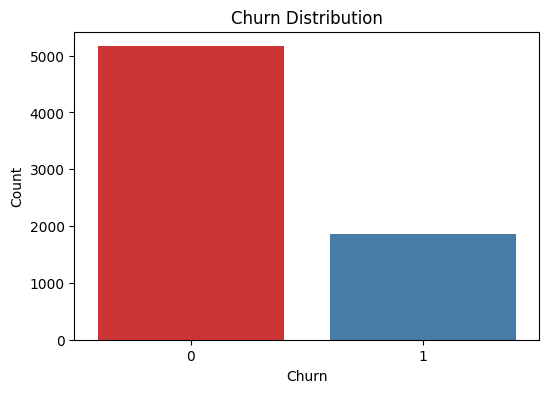

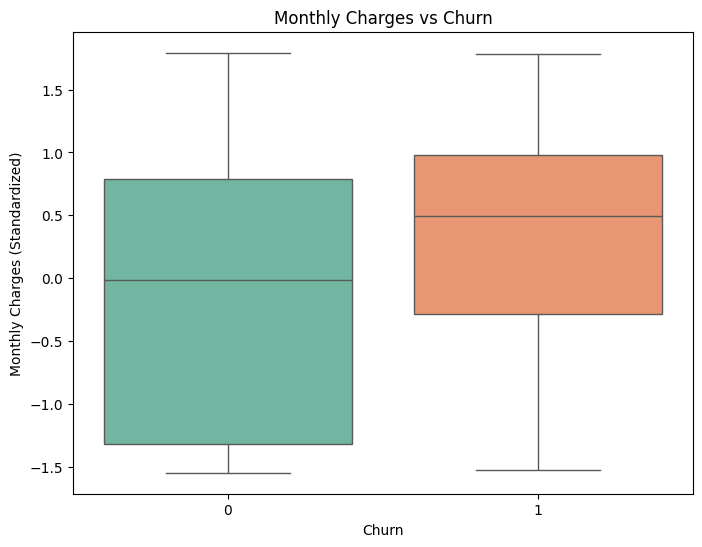

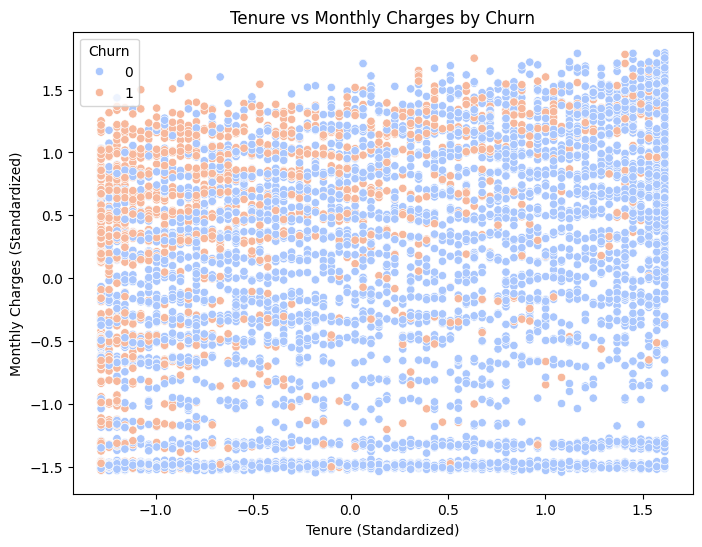

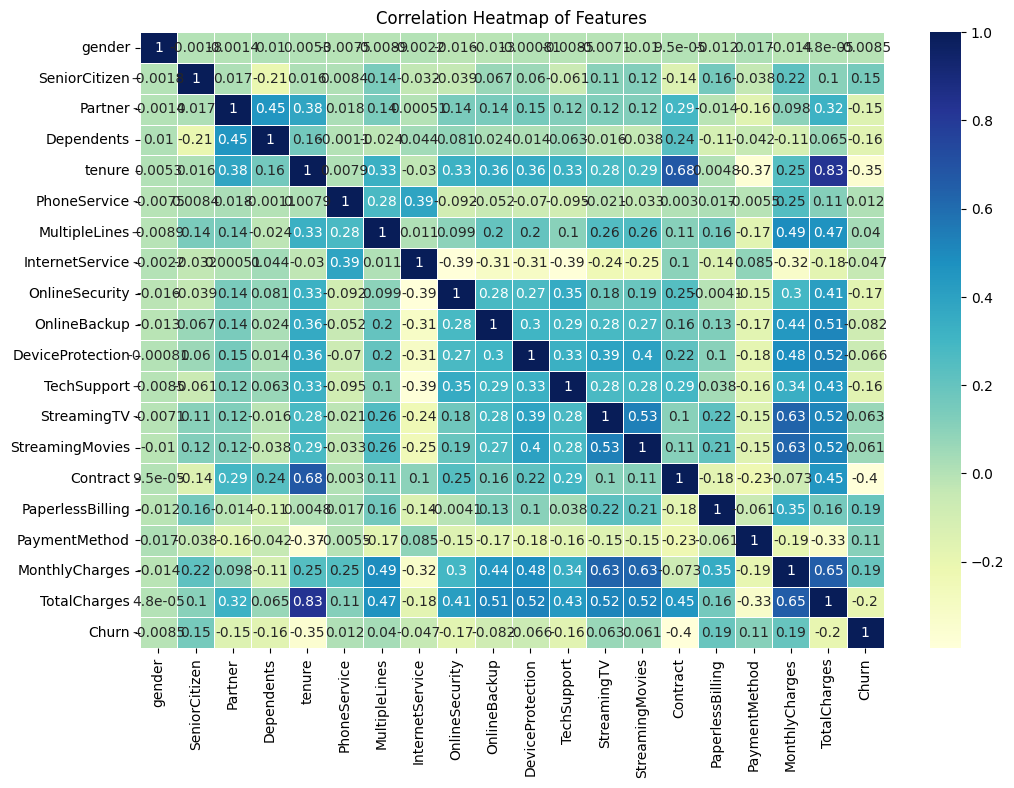

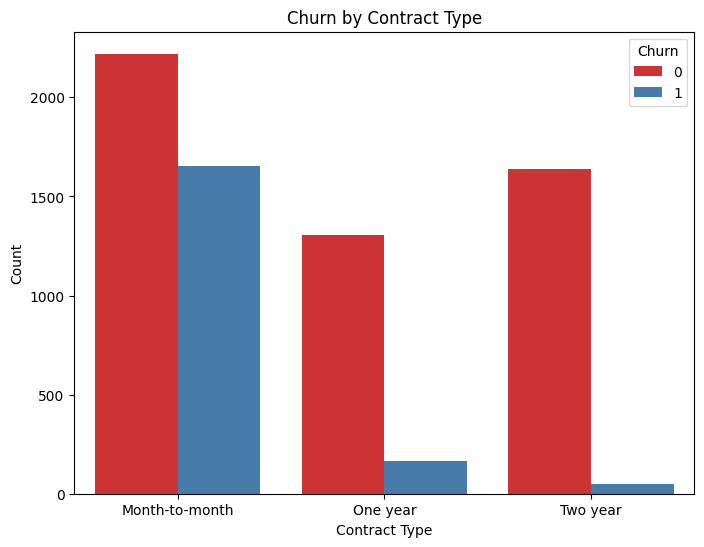

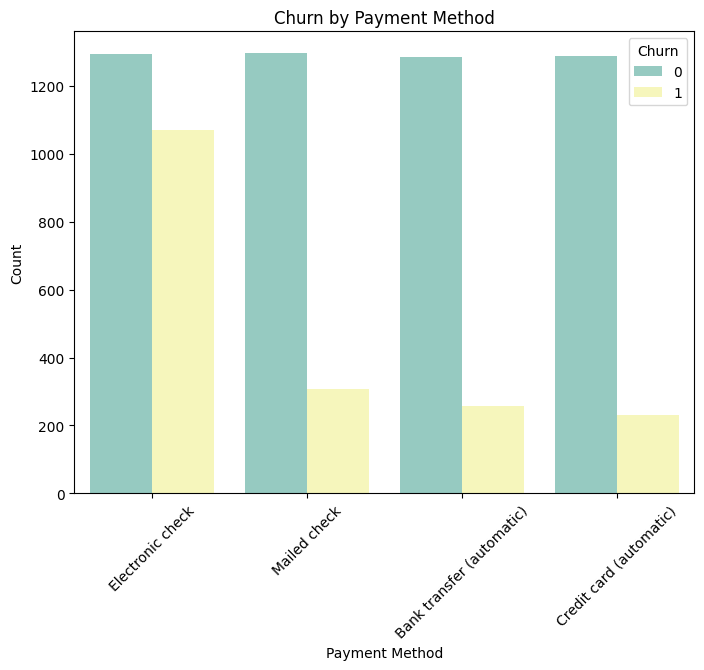

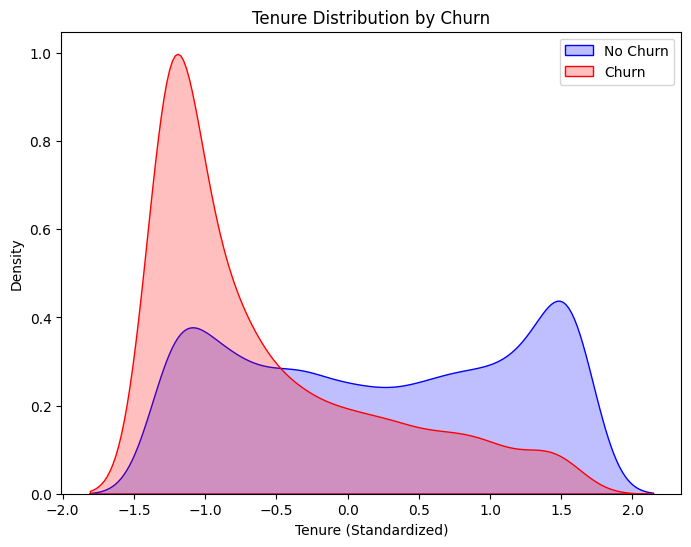

Logistic Regression Accuracy: 78.46%

Confusion Matrix:
 [[921 112]
 [191 183]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407

Decision Tree Accuracy: 72.21%

Confusion Matrix:
 [[824 209]
 [182 192]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.72      0.73      1407

Churn rate for high charges customers: 35.21%
Churn rate for low charges customers: 17.96%

Conclusion:
- Logistic Regression model achieved a

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv"
data = pd.read_csv(url)

# Display first few rows of the dataset
print("First five rows of the dataset:")
print(data.head())

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Convert 'TotalCharges' to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Confirm no missing values
print("\nChecking for missing values after cleaning:")
print(data.isnull().sum())

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

# Drop unnecessary columns
data.drop(['customerID'], axis=1, inplace=True)

# Data Preprocessing
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in replace_cols:
    data[col] = data[col].replace({'No internet service':'No'})

data['MultipleLines'] = data['MultipleLines'].replace({'No phone service':'No'})

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Feature Scaling
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data, palette="Set1")
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette="Set2")
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges (Standardized)')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data, palette="coolwarm")
plt.title('Tenure vs Monthly Charges by Churn')
plt.xlabel('Tenure (Standardized)')
plt.ylabel('Monthly Charges (Standardized)')
plt.show()

plt.figure(figsize=(12,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

contract_mapping = {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}
data['ContractType'] = data['Contract'].map(contract_mapping)

plt.figure(figsize=(8,6))
sns.countplot(x='ContractType', hue='Churn', data=data, palette="Set1")
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

payment_mapping = {0: 'Bank transfer (automatic)', 1: 'Credit card (automatic)', 2: 'Electronic check', 3: 'Mailed check'}
data['PaymentMethodType'] = data['PaymentMethod'].map(payment_mapping)

plt.figure(figsize=(8,6))
sns.countplot(x='PaymentMethodType', hue='Churn', data=data, palette="Set3")
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

plt.figure(figsize=(8,6))
sns.kdeplot(data.loc[data['Churn'] == 0, 'tenure'], label='No Churn', shade=True, color='blue')
sns.kdeplot(data.loc[data['Churn'] == 1, 'tenure'], label='Churn', shade=True, color='red')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Standardized)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Splitting Data into Train and Test Sets
X = data.drop(['Churn', 'ContractType', 'PaymentMethodType'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_lr)*100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_dt)*100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Hypothesis Testing
median_charges = data['MonthlyCharges'].median()
high_charges = data[data['MonthlyCharges'] > median_charges]
low_charges = data[data['MonthlyCharges'] <= median_charges]
high_charges_churn_rate = high_charges['Churn'].mean()
low_charges_churn_rate = low_charges['Churn'].mean()

print("Churn rate for high charges customers: {:.2f}%".format(high_charges_churn_rate * 100))
print("Churn rate for low charges customers: {:.2f}%".format(low_charges_churn_rate * 100))

# Conclusion and Recommendations
print("\nConclusion:")
print("- Logistic Regression model achieved an accuracy of {:.2f}%.".format(accuracy_score(y_test, y_pred_lr)*100))
print("- Customers with higher monthly charges and shorter tenure are more likely to churn.")
print("- Month-to-month contracts and electronic check payment methods are associated with higher churn rates.")

print("\nRecommendations:")
print("- Implement loyalty programs for customers with high monthly charges.")
print("- Encourage customers to switch to longer-term contracts with incentives.")
print("- Promote automatic payment methods to reduce churn associated with electronic checks.")
